In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import os

In [4]:
import cv2

In [5]:
import tensorflow as tf

In [6]:
from tensorflow.keras.models import Sequential

In [7]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [8]:
import matplotlib.pyplot as plt

In [9]:
path = "C:/Users/hp/Desktop/Facial_Emotion/"

In [10]:
path

'C:/Users/hp/Desktop/Facial_Emotion/'

In [11]:
path_angry = path + "angry/"

In [12]:
path_angry

'C:/Users/hp/Desktop/Facial_Emotion/angry/'

In [13]:
path_disgust = path+"disgust/"

In [14]:
path_disgust

'C:/Users/hp/Desktop/Facial_Emotion/disgust/'

In [15]:
path_fear = path + "fear/"

In [16]:
path_fear

'C:/Users/hp/Desktop/Facial_Emotion/fear/'

In [17]:
path_happy = path + "happy/"

In [18]:
path_happy

'C:/Users/hp/Desktop/Facial_Emotion/happy/'

In [19]:
path_neutral = path+"neutral/"

In [20]:
path_neutral

'C:/Users/hp/Desktop/Facial_Emotion/neutral/'

In [21]:
path_sad = path+"sad/"

In [22]:
path_sad

'C:/Users/hp/Desktop/Facial_Emotion/sad/'

In [23]:
path_surprise = path+"surprise/"

In [24]:
path_surprise

'C:/Users/hp/Desktop/Facial_Emotion/surprise/'

In [25]:
namelist = ["angry", "disgust","fear","happy","neutral","sad","surprise"]

In [26]:
namelist

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [27]:
path_list = [path_angry, path_disgust, path_fear, path_happy, path_neutral, path_sad, path_surprise]

In [28]:
"img_"+namelist[0]

'img_angry'

In [29]:
path_list[0]

'C:/Users/hp/Desktop/Facial_Emotion/angry/'

In [30]:
img = "Image_"

In [31]:
import time

In [32]:
img_dataset = []
img_label = []

In [33]:
for i in range(len(path_list)):
    image_name = os.listdir(path_list[i])
    for img in image_name :
         image = cv2.imread(path_list[i]+img)
         image = cv2.resize(image,(100,100))
         img_dataset.append(np.array(image))
         img_label.append(i)

        
         

In [34]:
len(img_dataset)

28888

In [35]:
len(img_label)

28888

In [36]:
img_dataset_array = np.array(img_dataset)

In [37]:
img_label_array = np.array(img_label)

### Scaling

In [38]:
img_dataset_scale = img_dataset_array/255.0

In [39]:
X = img_dataset_scale

In [40]:
y = img_label_array

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [52]:
X_train.shape

(23110, 100, 100, 3)

In [43]:
smodel = Sequential()

In [44]:
smodel.add(Input(shape = (100,100,3)))

In [45]:
smodel.add(   Conv2D(filters=32, kernel_size=(3,3), activation="relu", strides=(1,1), padding="valid")  )
smodel.add( MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))
smodel.add( Dropout(0.20))

In [46]:
smodel.add(   Conv2D(filters=64, kernel_size=(3,3), activation="relu", strides=(1,1), padding="valid")  )
smodel.add( MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))
smodel.add( Dropout(0.20))

In [47]:
smodel.add(   Conv2D(filters=32, kernel_size=(3,3), activation="relu", strides=(1,1), padding="valid")  )
smodel.add( MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))
smodel.add( Dropout(0.20))

In [48]:
smodel.add(Flatten())

In [49]:
smodel.add( Dense(128, activation="relu"))
smodel.add(Dense(64, activation = "relu"))
smodel.add(Dense(128, activation = "relu"))
smodel.add(Dense(7, activation = "softmax"))

In [50]:
smodel.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [53]:
smodel.fit(X_train, y_train, epochs = 10)

Epoch 1/10
723/723 [==============================] - 125s 170ms/step - loss: 1.8667 - accuracy: 0.2293
Epoch 2/10
723/723 [==============================] - 128s 177ms/step - loss: 1.6339 - accuracy: 0.3630
Epoch 3/10
723/723 [==============================] - 128s 177ms/step - loss: 1.4415 - accuracy: 0.4387
Epoch 4/10
723/723 [==============================] - 128s 176ms/step - loss: 1.3014 - accuracy: 0.4882
Epoch 5/10
723/723 [==============================] - 127s 176ms/step - loss: 1.1943 - accuracy: 0.5299
Epoch 6/10
723/723 [==============================] - 131s 181ms/step - loss: 1.1150 - accuracy: 0.5610
Epoch 7/10
723/723 [==============================] - 128s 177ms/step - loss: 1.0432 - accuracy: 0.5907
Epoch 8/10
723/723 [==============================] - 128s 177ms/step - loss: 0.9844 - accuracy: 0.6123
Epoch 9/10
723/723 [==============================] - 128s 177ms/step - loss: 0.9290 - accuracy: 0.6362
Epoch 10/10
723/723 [==============================] - 128s 177m

In [54]:
smodel.evaluate(X_test, y_test)

181/181 [==============================] - 7s 36ms/step - loss: 1.1603 - accuracy: 0.5545


[1.1602965593338013, 0.5545171499252319]

###  Prediction

In [55]:
X_train[2108]

array([[[0.56470588, 0.56470588, 0.56470588],
        [0.58431373, 0.58431373, 0.58431373],
        [0.61960784, 0.61960784, 0.61960784],
        ...,
        [0.03137255, 0.03137255, 0.03137255],
        [0.01960784, 0.01960784, 0.01960784],
        [0.01568627, 0.01568627, 0.01568627]],

       [[0.57647059, 0.57647059, 0.57647059],
        [0.58823529, 0.58823529, 0.58823529],
        [0.61568627, 0.61568627, 0.61568627],
        ...,
        [0.02745098, 0.02745098, 0.02745098],
        [0.01960784, 0.01960784, 0.01960784],
        [0.01568627, 0.01568627, 0.01568627]],

       [[0.60784314, 0.60784314, 0.60784314],
        [0.60784314, 0.60784314, 0.60784314],
        [0.60392157, 0.60392157, 0.60392157],
        ...,
        [0.02352941, 0.02352941, 0.02352941],
        [0.01960784, 0.01960784, 0.01960784],
        [0.01568627, 0.01568627, 0.01568627]],

       ...,

       [[0.2745098 , 0.2745098 , 0.2745098 ],
        [0.28235294, 0.28235294, 0.28235294],
        [0.29411765, 0

In [56]:
X_train.shape

(23110, 100, 100, 3)

In [57]:
X_train[2108].shape

(100, 100, 3)

In [59]:
p_img = X_train[2108].reshape((1,)+X_train[2108].shape)

In [60]:
smodel.predict(p_img)

1/1 [==============================] - 0s 191ms/step


array([[6.4815328e-02, 1.8539212e-11, 6.8634138e-02, 2.2410898e-01,
        5.1650956e-02, 5.8661687e-01, 4.1737338e-03]], dtype=float32)

In [61]:
np.argmax(smodel.predict(p_img))

1/1 [==============================] - 0s 26ms/step


5

In [62]:
namelist[5]

'sad'

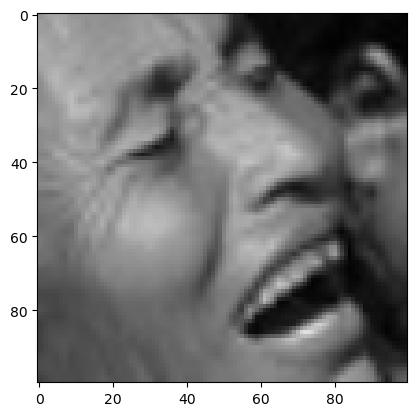

In [63]:
plt.imshow(X_train[2108])